In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
def r(x,y):
    return np.sqrt(x**2+y**2)

In [82]:
def theta(x,y):
    return np.arctan2(y,x)

In [83]:
def dr(x,y,vx,vy):
    return (x*vx+y*vy)/np.sqrt(x**2+y**2)

In [84]:
def dtheta(x,y,vx,vy):
    return (x*vy-vx*y)/np.sqrt(x**2+y**2)

In [85]:
def dr_dx(x,y):
    return x/np.sqrt(x**2+y**2)

In [86]:
def dr_dy(x,y):
    return y/np.sqrt(x**2+y**2)

In [87]:
def dtheta_dx(x,y):
    return -y/(x**2+y**2)

In [88]:
def dtheta_dy(x,y):
    return x/(x**2+y**2)

In [89]:
def ddr_dy(x,y,vx,vy):
    return (-vx*x*y+vy*x**2)/((x**2+y**2)*np.sqrt(x**2+y**2))

In [90]:
def ddr_dx(x,y,vx,vy):
    return (-vy*x*y+vx*y**2)/((x**2+y**2)*np.sqrt(x**2+y**2))

In [91]:
def ddr_dvx(x,y,vx,vy):
    return x/np.sqrt(x**2+y**2)

In [92]:
def ddr_dvy(x,y,vx,vy):
    return y/np.sqrt(x**2+y**2)

In [93]:
def ddtheta_dy(x,y,vx,vy):
    return (-vy*x*y-vx*x**2)/((x**2+y**2)*np.sqrt(x**2+y**2))

In [94]:
def ddtheta_dx(x,y,vx,vy):
    return (vx*x*y+vx*y**2)/((x**2+y**2)*np.sqrt(x**2+y**2))

In [95]:
def ddtheta_dvx(x,y,vx,vy):
    return -y/np.sqrt(x**2+y**2)

In [96]:
def ddtheta_dvy(x,y,vx,vy):
    return x/np.sqrt(x**2+y**2)

In [97]:
def get_xy(r,theta):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    return x, y

In [98]:
def residual(R_hat,THETA_hat,DR_hat,DTHETA_hat,X,Y,VX,VY):
    residual_R = (R_hat-r(X,Y))**2
    residual_THETA = (THETA_hat-theta(X,Y))**2
    residual_DR = (DR_hat-dr(X,Y,VX,VY))**2
    residual_DTHETA = (DTHETA_hat-dtheta(X,Y,VX,VY))**2
    return residual_R+residual_THETA+residual_DR+residual_DTHETA

In [99]:
def df_dx(R_hat,THETA_hat,DR_hat,DTHETA_hat,X,Y,VX,VY):
    p1 = -2*(R_hat-r(X,Y))*dr_dx(X,Y)
    p2 = -2*(THETA_hat-theta(X,Y))*dtheta_dx(X,Y)
    p3 = -2*(DR_hat-dr(X,Y,VX,VY))*ddr_dx(X,Y,VX,VY)
    p4 = -2*(DTHETA_hat-dtheta(X,Y,VX,VY))*ddtheta_dx(X,Y,VX,VY)
    return p1+p2+p3+p4

In [100]:
def df_dy(R_hat,THETA_hat,DR_hat,DTHETA_hat,X,Y,VX,VY):
    p1 = -2*(R_hat-r(X,Y))*dr_dy(X,Y)
    p2 = -2*(THETA_hat-theta(X,Y))*dtheta_dy(X,Y)
    p3 = -2*(DR_hat-dr(X,Y,VX,VY))*ddr_dy(X,Y,VX,VY)
    p4 = -2*(DTHETA_hat-dtheta(X,Y,VX,VY))*ddtheta_dy(X,Y,VX,VY)
    return p1+p2+p3+p4

In [101]:
def df_dvx(R_hat,THETA_hat,DR_hat,DTHETA_hat,X,Y,VX,VY):
    p1 = 0
    p2 = 0
    p3 = -2*(DR_hat-dr(X,Y,VX,VY))*ddr_dvx(X,Y,VX,VY)
    p4 = -2*(DTHETA_hat-dtheta(X,Y,VX,VY))*ddtheta_dvx(X,Y,VX,VY)
    return p1+p2+p3+p4

In [102]:
def df_dvy(R_hat,THETA_hat,DR_hat,DTHETA_hat,X,Y,VX,VY):
    p1 = 0
    p2 = 0
    p3 = -2*(DR_hat-dr(X,Y,VX,VY))*ddr_dvy(X,Y,VX,VY)
    p4 = -2*(DTHETA_hat-dtheta(X,Y,VX,VY))*ddtheta_dvy(X,Y,VX,VY)
    return p1+p2+p3+p4

In [103]:
def residual2(R_hat,THETA_hat,X,Y):
    residual_R = (R_hat-r(X,Y))**2
    residual_THETA = (THETA_hat-theta(X,Y))**2
    return np.sum(residual_R+residual_THETA)

In [104]:
def df2_dx(R_hat,THETA_hat,X,Y):
    p1 = -2*(R_hat-r(X,Y))*dr_dx(X,Y)
    p2 = -2*(THETA_hat-theta(X,Y))*dtheta_dx(X,Y)
    return (p1+p2).sum()

In [105]:
def df2_dy(R_hat,THETA_hat,X,Y):
    p1 = -2*(R_hat-r(X,Y))*dr_dy(X,Y)
    p2 = -2*(THETA_hat-theta(X,Y))*dtheta_dy(X,Y)
    return (p1+p2).sum()

In [106]:
data1 = pd.read_csv('../data/loop2/gauss_noise1_rt.csv')
data2 = pd.read_csv('../data/loop2/gauss_noise2_rt.csv')
gt_data = pd.read_csv('../data/loop2/ground_truth.csv')

In [107]:
data1 = data1.to_numpy()
data2 = data2.to_numpy()
gt_data = gt_data.to_numpy()

In [108]:
R_hat1 = data1[:,2]
THETA_hat1 = data1[:,3]
R_hat2 = data2[:,2]
THETA_hat2 = data2[:,3]

In [109]:
def gradientDescent(R, THETA,init_x,init_y, lr, numIterations):
    loss = residual2(R,THETA,init_x,init_y)
    x = init_x
    y = init_y
    best_x  = x
    best_y = y
    for i in range(numIterations):
        dx = df2_dx(R,THETA,x,y)
        dy = df2_dy(R,THETA,x,y)
        x = x - lr*dx
        y = y - lr*dy
        tmp_loss =  residual2(R,THETA,x,y)
        if tmp_loss<loss:
            loss = tmp_loss
            best_x = x 
            best_y = y 
            
    return best_x,best_y, loss

In [110]:
estimated_x = []
estimated_y = []
all_loss=[]

for i in range(len(R_hat1)):
    R = [R_hat1[i],R_hat2[i]]
    THETA = [THETA_hat1[i],THETA_hat2[i]]
    init_x, init_y = get_xy(R,THETA)
    init_x, init_y = init_x.mean(), init_y.mean()
    best_x,best_y,loss = gradientDescent(R,THETA,init_x,init_y,0.01,500)
    estimated_x.append(best_x)
    estimated_y.append(best_y)
    all_loss.append(loss)

In [111]:
gt_x = gt_data[:,2]+75
gt_y = gt_data[:,3]+50
gt_r = np.sqrt(gt_x**2+gt_y**2)
gt_theta = np.arctan2(gt_y,gt_x)
gt_x,gt_y = get_xy(gt_r,gt_theta)
x1,y1 = get_xy(R_hat1,THETA_hat1)
x2,y2 = get_xy(R_hat2,THETA_hat2)

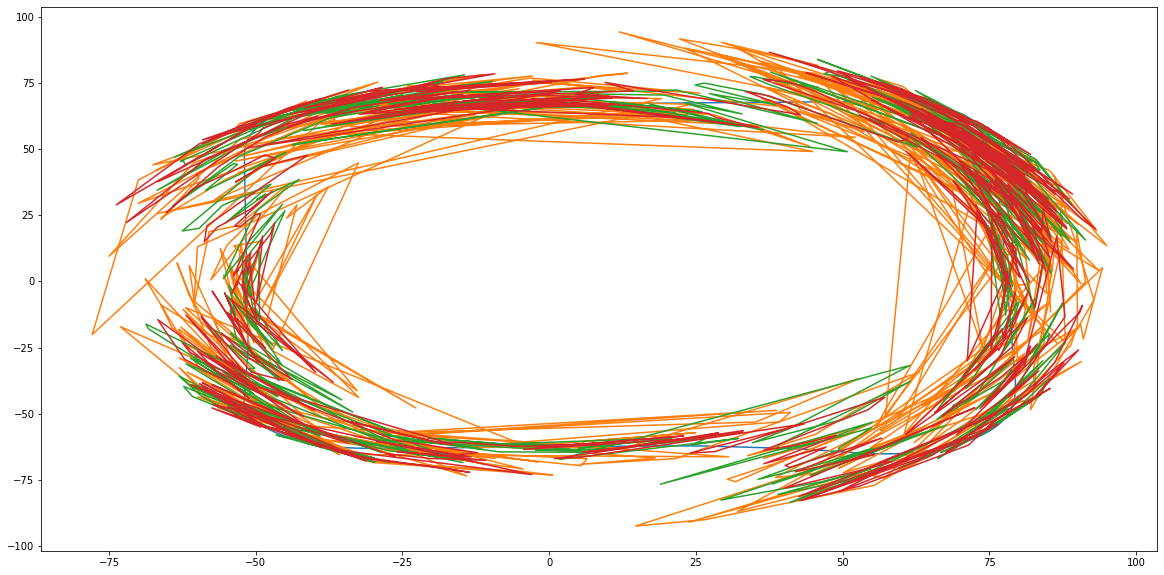

In [112]:
fig = plt.figure(figsize=(20,10))
plt.plot(gt_x,gt_y)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(estimated_x,estimated_y)